In [1]:
import json

# Load the JSON output generated by pydeps
with open('./fastapi/fastapi/dependencies.json', 'r') as f:
    data = json.load(f)

In [2]:
fan_out = {}
fan_in = {}

In [3]:
for module, details in data.items():
    # Fan-Out: Number of modules this module imports
    imports = details.get('imports', [])
    fan_out[module] = len(imports)
    
    # Update Fan-In: Number of modules that import this module
    for imported_module in imports:
        if imported_module not in fan_in:
            fan_in[imported_module] = 0
        fan_in[imported_module] += 1

# Ensure every module is present in fan_in (even if count is 0)
for module in data.keys():
    if module not in fan_in:
        fan_in[module] = 0


In [4]:
from pprint import pprint

print(f"{'Module':<40} {'Fan-In':<10} {'Fan-Out':<10}")
print("="*60)
for module in data.keys():
    print(f"{module:<40} {fan_in[module]:<10} {fan_out[module]:<10}")


Module                                   Fan-In     Fan-Out   
__main__                                 0          44        
fastapi                                  21         9         
fastapi.__main__                         1          2         
fastapi._compat                          11         6         
fastapi.applications                     2          12        
fastapi.background                       3          0         
fastapi.cli                              2          0         
fastapi.concurrency                      2          0         
fastapi.datastructures                   6          2         
fastapi.dependencies                     4          0         
fastapi.dependencies.models              4          4         
fastapi.dependencies.utils               3          13        
fastapi.encoders                         5          3         
fastapi.exception_handlers               2          5         
fastapi.exceptions                       8          0  

In [5]:
# !pip install matplotlib

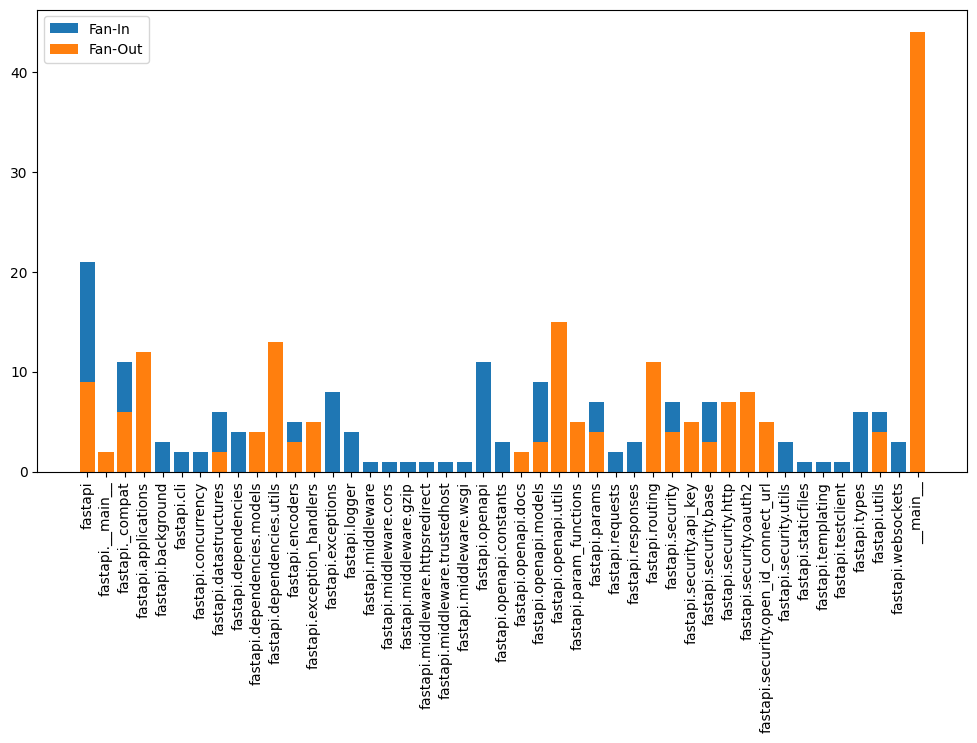

In [6]:
# Plot a bar chart with Fan-In and Fan-Out and x-axis labels 90 degree rotated
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(fan_in.keys(), fan_in.values(), label='Fan-In')
ax.bar(fan_out.keys(), fan_out.values(), label='Fan-Out')
plt.xticks(rotation=90)
plt.legend()
plt.show()


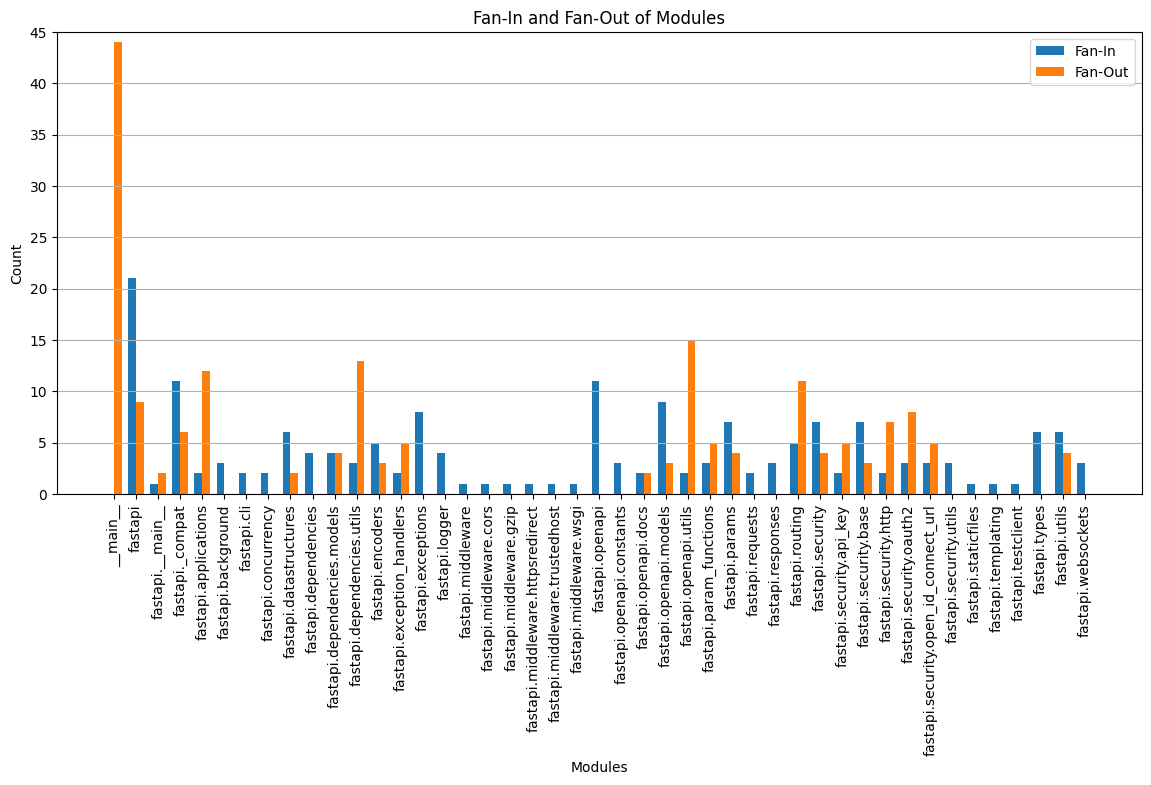

In [7]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14, 6))

# Define the width of the bars
bar_width = 0.35

# Create an array with the positions of the bars on the x-axis
index = np.arange(len(fan_in))

# Sort the keys to ensure the order is the same for both fan_in and fan_out
sorted_keys = sorted(fan_in.keys())

# Plot Fan-In bars
ax.bar(index, [fan_in[key] for key in sorted_keys], bar_width, label='Fan-In')

# Plot Fan-Out bars next to Fan-In bars
ax.bar(index + bar_width, [fan_out[key] for key in sorted_keys], bar_width, label='Fan-Out')

# Set the x-axis labels
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(sorted_keys, rotation=90)

# Set the title and labels
ax.set_title('Fan-In and Fan-Out of Modules')
ax.set_xlabel('Modules')
ax.set_ylabel('Count')
# Set the y-axis limit
ax.set_ylim(0, max(max(fan_in.values()), max(fan_out.values())) + 1)
# Add grid lines
ax.yaxis.grid(True)

# Add legend
plt.legend()

# Show the plot
plt.show()
